### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- CustomerID: 고객 번호
- PurchaseDate: 구매 날짜
- TransactionAmount: 결제 금액
- ProductInformation: 상품 정보
- OrderID: 주문 번호
- Location: 주문 지역

In [1]:
import pandas as pd

path = "./datasets/customer_order_data.csv"
cp_df = pd.read_csv(path, sep=",")
display(cp_df)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [2]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


#### 중복 행 검사

In [3]:
cp_df.duplicated().sum()


0

#### 결측치 검사

In [4]:
cp_df.isna().sum()
# cp_df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

#### 결측치를 데이터 탐색을 통해 선정된 대표값으로 채우기(결측치가 없어 생략)

#### 이상치(Outlier) 검사

In [5]:
cp_df[cp_df['TransactionAmount'] < 0]

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location


In [6]:
import numpy as np

Q1 = cp_df.describe().T.loc['TransactionAmount', '25%']
Q3 = cp_df.describe().T.loc['TransactionAmount', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 1513.97


In [7]:
cp_df = cp_df[cp_df['TransactionAmount'] <= upper_bound]
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


#### 데이터 전처리
- OrderID는 불필요하다 판단하여 삭제

In [8]:
cp_df = cp_df.drop(labels=['OrderID'], axis=1)
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location
0,8814,2023-04-11,943.31,Product C,Tokyo
1,2188,2023-04-11,463.70,Product A,London
2,4608,2023-04-11,80.28,Product A,New York
3,2559,2023-04-11,221.29,Product A,London
4,9482,2023-04-11,739.56,Product A,Paris
...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,London
996,6669,2023-06-10,941.50,Product C,New York
997,8836,2023-06-10,545.36,Product C,London
998,1440,2023-06-10,729.94,Product B,Paris


In [9]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   Location            1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [68]:
cp_df['CustomerID'].value_counts()
cp_df['Frequency'] = cp_df.groupby('CustomerID')['CustomerID'].transform('count')
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location,TotalScore,Level,Frequency
374,1480,2023-05-02,809.04,Product C,New York,1.229879,VIP,2
951,1480,2023-06-07,812.58,Product C,Tokyo,1.229879,VIP,2


In [11]:
cp_df['PurchaseDate'] = pd.to_datetime(cp_df['PurchaseDate'])
LatestPurchaseDate = cp_df.groupby('CustomerID')['PurchaseDate'].transform('max')
cp_df['Recency'] = (pd.Timestamp.now() - LatestPurchaseDate).dt.days
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location,Frequency,Recency
0,8814,2023-04-11,943.31,Product C,Tokyo,1,352
1,2188,2023-04-11,463.70,Product A,London,1,352
2,4608,2023-04-11,80.28,Product A,New York,1,352
3,2559,2023-04-11,221.29,Product A,London,1,352
4,9482,2023-04-11,739.56,Product A,Paris,1,352
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,London,1,292
996,6669,2023-06-10,941.50,Product C,New York,1,292
997,8836,2023-06-10,545.36,Product C,London,1,292
998,1440,2023-06-10,729.94,Product B,Paris,1,292


In [12]:
cp_df['Monetary'] = cp_df.groupby('CustomerID')['TransactionAmount'].transform('sum')
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location,Frequency,Recency,Monetary
0,8814,2023-04-11,943.31,Product C,Tokyo,1,352,943.31
1,2188,2023-04-11,463.70,Product A,London,1,352,463.70
2,4608,2023-04-11,80.28,Product A,New York,1,352,80.28
3,2559,2023-04-11,221.29,Product A,London,1,352,221.29
4,9482,2023-04-11,739.56,Product A,Paris,1,352,739.56
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,London,1,292,759.62
996,6669,2023-06-10,941.50,Product C,New York,1,292,941.50
997,8836,2023-06-10,545.36,Product C,London,1,292,545.36
998,1440,2023-06-10,729.94,Product B,Paris,1,292,729.94


In [13]:
cp_rfm_df = cp_df[['Recency', 'Frequency', 'Monetary']]
cp_rfm_df

,Recency,Frequency,Monetary
0,352,1,943.31
1,352,1,463.70
2,352,1,80.28
3,352,1,221.29
4,352,1,739.56
...,...,...,...
995,292,1,759.62
996,292,1,941.50
997,292,1,545.36
998,292,1,729.94


#### 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(cp_rfm_df)

In [15]:
cp_rfm_df = pd.DataFrame(rfm_normalization, columns=cp_rfm_df.columns)
cp_rfm_df

,Recency,Frequency,Monetary
0,1.0,0.0,0.393348
1,1.0,0.0,0.190752
2,1.0,0.0,0.028788
3,1.0,0.0,0.088353
4,1.0,0.0,0.307280
...,...,...,...
995,0.0,0.0,0.315754
996,0.0,0.0,0.392583
997,0.0,0.0,0.225246
998,0.0,0.0,0.303216


In [16]:
cp_df['TotalScore'] = cp_rfm_df['Recency'] + cp_rfm_df['Frequency'] + cp_rfm_df['Monetary']

In [17]:
cp_df = cp_df.drop(columns=['Recency', 'Frequency', 'Monetary'], axis=1)
cp_df


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location,TotalScore
0,8814,2023-04-11,943.31,Product C,Tokyo,1.393348
1,2188,2023-04-11,463.70,Product A,London,1.190752
2,4608,2023-04-11,80.28,Product A,New York,1.028788
3,2559,2023-04-11,221.29,Product A,London,1.088353
4,9482,2023-04-11,739.56,Product A,Paris,1.307280
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,London,0.315754
996,6669,2023-06-10,941.50,Product C,New York,0.392583
997,8836,2023-06-10,545.36,Product C,London,0.225246
998,1440,2023-06-10,729.94,Product B,Paris,0.303216


In [18]:
import numpy as np

l1, l2, l3, l4 = np.percentile(cp_df['TotalScore'], [20, 40, 60, 90])
print(l1, l2, l3, l4)

0.42773048566874533 0.6856970188511344 0.8856247007868255 1.2255806284462325


In [19]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [20]:
cp_df['Level'] = cp_df['TotalScore'].apply(get_level)
cp_df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location,TotalScore,Level
0,8814,2023-04-11,943.31,Product C,Tokyo,1.393348,1
1,2188,2023-04-11,463.70,Product A,London,1.190752,2
2,4608,2023-04-11,80.28,Product A,New York,1.028788,2
3,2559,2023-04-11,221.29,Product A,London,1.088353,2
4,9482,2023-04-11,739.56,Product A,Paris,1.307280,1
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,London,0.315754,5
996,6669,2023-06-10,941.50,Product C,New York,0.392583,5
997,8836,2023-06-10,545.36,Product C,London,0.225246,5
998,1440,2023-06-10,729.94,Product B,Paris,0.303216,5


In [60]:
cp_df['Level'] = cp_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
cp_df[cp_df['Level'] == 'Gold']

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location,TotalScore,Level
130,3392,2023-04-19,47.92,Product D,London,0.881785,Gold
131,2911,2023-04-19,54.89,Product A,Tokyo,0.884729,Gold
134,6447,2023-04-19,53.89,Product C,London,0.884307,Gold
137,4157,2023-04-19,52.25,Product A,Tokyo,0.883614,Gold
147,1317,2023-04-20,59.14,Product A,New York,0.869858,Gold
...,...,...,...,...,...,...,...
696,7078,2023-05-23,949.89,Product D,London,0.696127,Gold
703,9538,2023-05-23,982.29,Product D,Paris,0.709814,Gold
746,9331,2023-05-26,108.61,Product C,New York,0.802604,Gold
858,7793,2023-06-01,336.92,Product A,Tokyo,0.810447,Gold


In [59]:
cp_df['PurchaseDate'].value_counts()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,Location,TotalScore,Level
0,8814,2023-04-11,943.31,Product C,Tokyo,1.393348,VIP
7,6911,2023-04-11,433.33,Product C,Tokyo,1.177923,Diamond
14,9148,2023-04-12,99.15,Product D,Tokyo,1.020092,Diamond
16,2767,2023-04-12,299.57,Product D,Tokyo,1.104753,Diamond
21,8529,2023-04-12,132.99,Product B,Tokyo,1.034387,Diamond
...,...,...,...,...,...,...,...
976,4470,2023-06-09,198.12,Product A,Tokyo,0.095232,Bronze
980,3880,2023-06-09,920.44,Product D,Tokyo,0.400354,Bronze
982,3213,2023-06-10,700.65,Product B,Tokyo,0.290844,Bronze
989,1960,2023-06-10,845.91,Product A,Tokyo,0.352204,Bronze


<Axes: xlabel='Level', ylabel='count'>

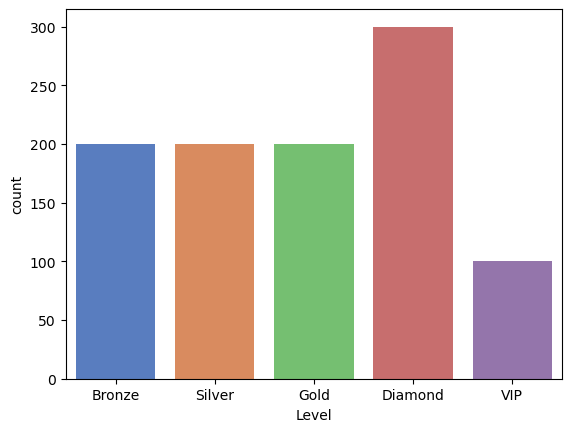

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x='Level', data=cp_df, palette='muted', order=order_columns)

In [49]:
print(cp_df['ProductInformation'].value_counts())
print(cp_df['Location'].value_counts())

ProductInformation
Product C    277
Product D    253
Product B    245
Product A    225
Name: count, dtype: int64
Location
Tokyo       278
New York    247
London      246
Paris       229
Name: count, dtype: int64


<Axes: xlabel='Location', ylabel='TransactionAmount'>

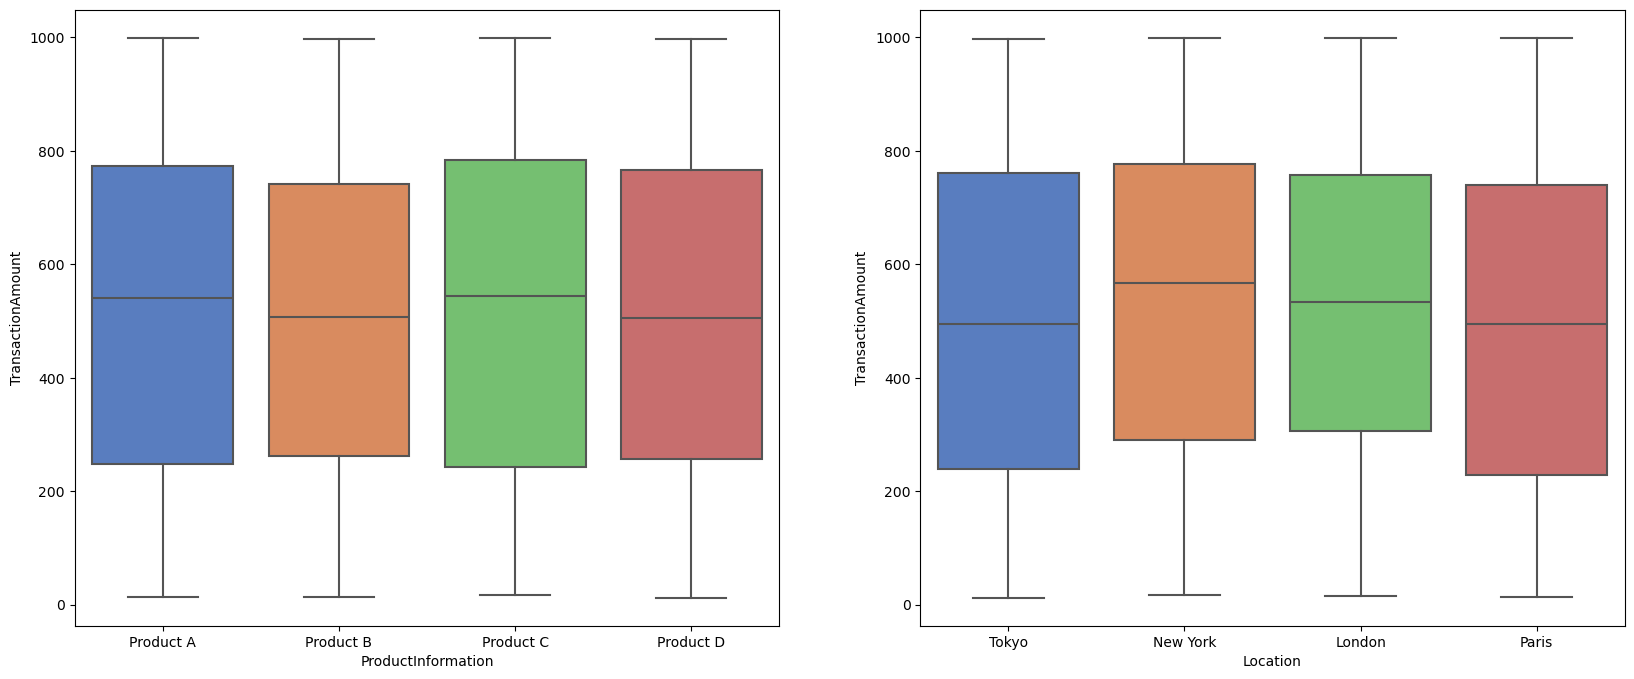

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

order_columns = ['Product A', 'Product B', 'Product C', 'Product D']
sns.boxplot(ax=axes[0], x='ProductInformation', y='TransactionAmount', data=cp_df, palette='muted', order=order_columns)

order_columns = ['Tokyo', 'New York', 'London', 'Paris']
sns.boxplot(ax=axes[1], x='Location', y='TransactionAmount', data=cp_df, palette='muted', order=order_columns)

<Axes: xlabel='Location', ylabel='count'>

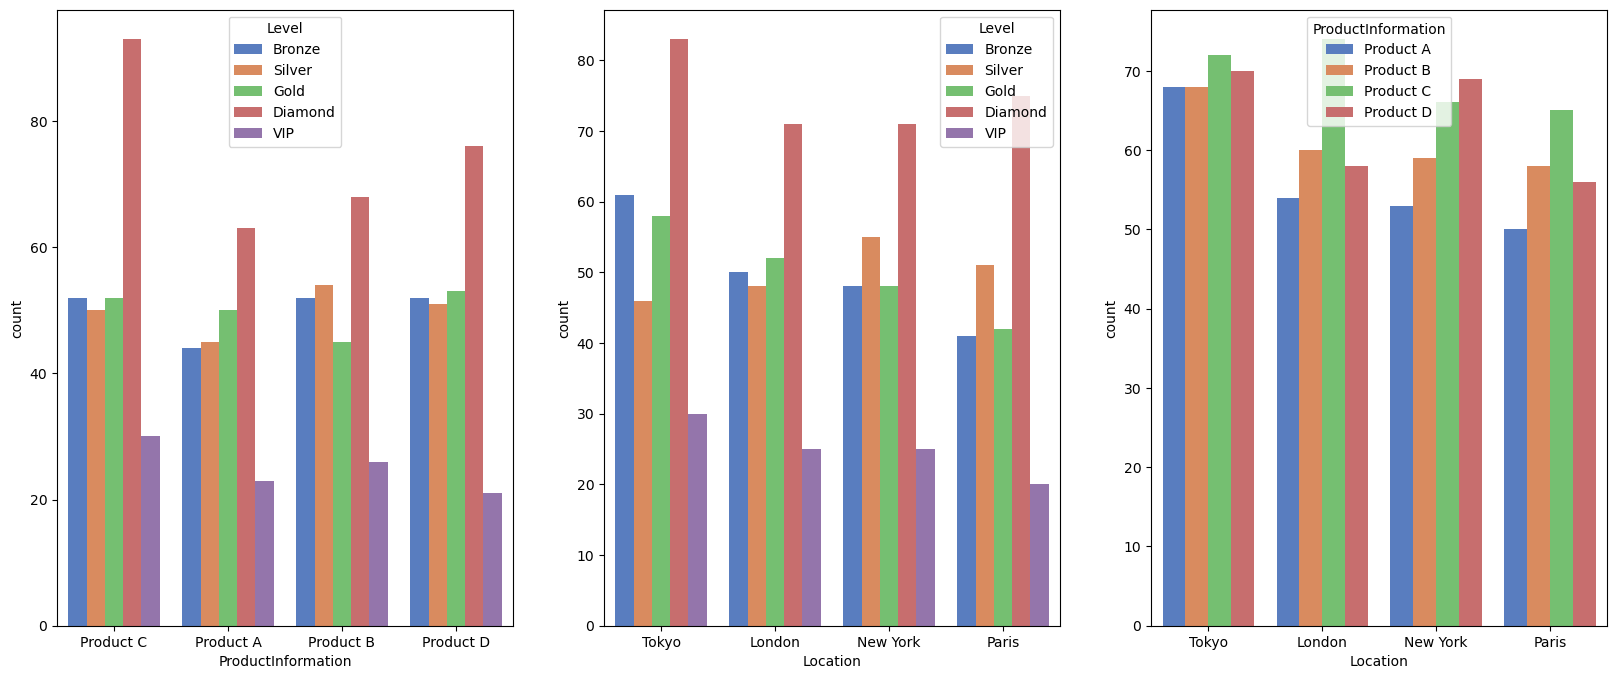

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

order_columns = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='ProductInformation', hue='Level', data=cp_df, palette='muted', hue_order=order_columns)
sns.countplot(ax=axes[1], x='Location', hue='Level', data=cp_df, palette='muted', hue_order=order_columns)

order_columns = ['Product A', 'Product B', 'Product C', 'Product D']
sns.countplot(ax=axes[2], x='Location', hue='ProductInformation', data=cp_df, palette='muted', hue_order=order_columns)

### 고객 행동 분석 보고서
- 고객 등급에 따른 거래 횟수를 분석한 결과, Diamond 등급 고객이 가장 자주 거래하며, VIP 등급 고객은 비교적 거래 횟수가 적다.  
  이는 고객 관리 전략에 있어 Diamond 등급 고객에게 더 많은 주목을 기울일 필요가 있음을 시사한다.

- 각 제품에 대한 결제 금액의 분포를 조사한 결과, 제품 B와 D의 결제 금액 중앙값이 높게 나타나며, 제품 A와 C는 상대적으로 낮은 중앙값을 보인다.  
  이는 고가의 제품이 더 큰 거래액을 차지한다는 것을 시사한다.

- 지역별로 분석한 결과, New York과 Paris에서의 결제 금액 중앙값이 높게 나타난다.  
  이는 해당 지역에서 고가의 제품 구매 빈도가 높다는 것을 의미할 수 있다.

- 제품 정보와 고객 등급 간의 상호 작용을 분석한 결과, VIP 고객이 제품 A를 가장 많이 구매했으며, Bronze 고객은 제품 D의 구매가 많다.  
  이는 각 등급별로 선호하는 제품이 있음을 나타낸다.

📌 데이터 분석을 통해 고객의 구매 패턴, 제품별 결제 금액, 지역별 소비 경향을 이해함으로써, 더 정교한 마케팅 전략을 수립하고 고객 맞춤형 접근을 통해 매출 증대의 가능성을 높일 수 있다..

### 마케팅 전략 제안
> Diamond 등급 고객의 활발한 거래를 고려하여 이들에게 특별 할인이나 혜택을 제공함으로써 매출을 늘리고 고객의 충성도를 높일 수 있다.  
> 뉴욕과 파리의 고객들이 더 많은 지출을 하는 경향이 있으므로, 이 지역에 고급 제품의 마케팅을 집중하여 매출 상승의 기회가 있다.  
> VIP 고객들에게 제품 A 광고를, Bronze 고객들에게 제품 D 정보를 더 제공하면 매출 증가의 가능성이 있다.